In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## shp 파일 시각화

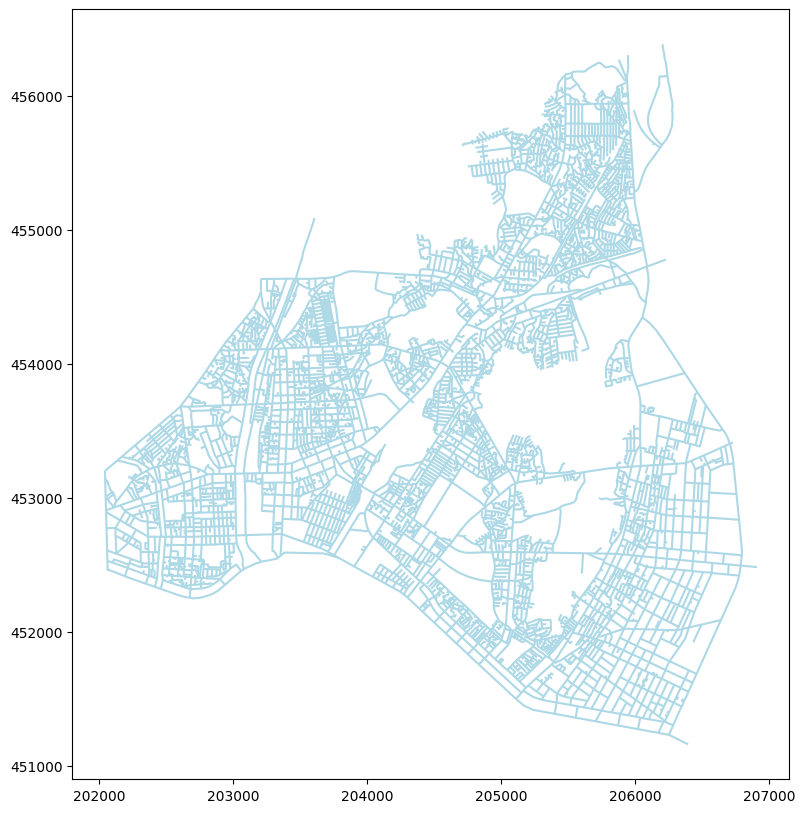

In [ ]:
# Shapefile 읽기
dir_path ="/content/drive/MyDrive/2024-02-machine-learning/data/geolocation_data"
file_name = "TL_SPRD_MANAGE.shp"
dongdaemun_map = gpd.read_file(f"{dir_path}/{file_name}")

# Shapefile에서 동대문구 필터링
filtered_map = dongdaemun_map[dongdaemun_map['SIG_CD'] == '11230']

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
filtered_map.plot(ax=ax, edgecolor='black', color='lightblue')
plt.show()

## CCTV 데이터 전처리

In [ ]:
# 보안등 데이터 읽기
dir_path = "/content/drive/MyDrive/bigdata/dataset"
file_name = "서울특별시_동대문구_CCTV.xlsx"
cctv = pd.read_excel(f"{dir_path}/{file_name}")

In [ ]:
cctv.head()

,기준연도,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,2020상,서울특별시 동대문구,서울특별시 동대문구 전농동 35,서울특별시 동대문구 답십리1동 268-4,어린이보호,3,200,NaN,NaN,2020-01-06,02-2127-4091,37.568101,127.056913,2020-04-01
1,2020상,서울특별시 동대문구,서울특별시 동대문구 천호대로69나길 23,서울특별시 동대문구 답십리1동 294-129,어린이보호,3,200,NaN,NaN,2020-01-06,02-2127-4091,37.569111,127.053758,2020-04-01
2,2020상,서울특별시 동대문구,서울특별시 동대문구 천호대로 281,서울특별시 동대문구 답십리1동 495-3,생활방범,3,200,NaN,NaN,2020-01-06,02-2127-4091,37.566899,127.052903,2020-04-01
3,2020상,서울특별시 동대문구,서울특별시 동대문구 사가정로2길 9,서울특별시 동대문구 답십리동 714,생활방범,3,200,NaN,NaN,2020-01-07,02-2127-4091,37.571352,127.050902,2020-04-01
4,2020상,서울특별시 동대문구,서울특별시 동대문구 답십리로38길 25,서울특별시 동대문구 답십리1동 470-3,생활방범,3,200,NaN,NaN,2020-01-07,02-2127-4091,37.573339,127.049876,2020-04-01


In [ ]:
# 필요한 칼럼만 선택하고 칼럼 이름 변경
cctv = cctv[['소재지도로명주소', '위도', '경도']].rename(columns={'위도': 'y', '경도': 'x'})

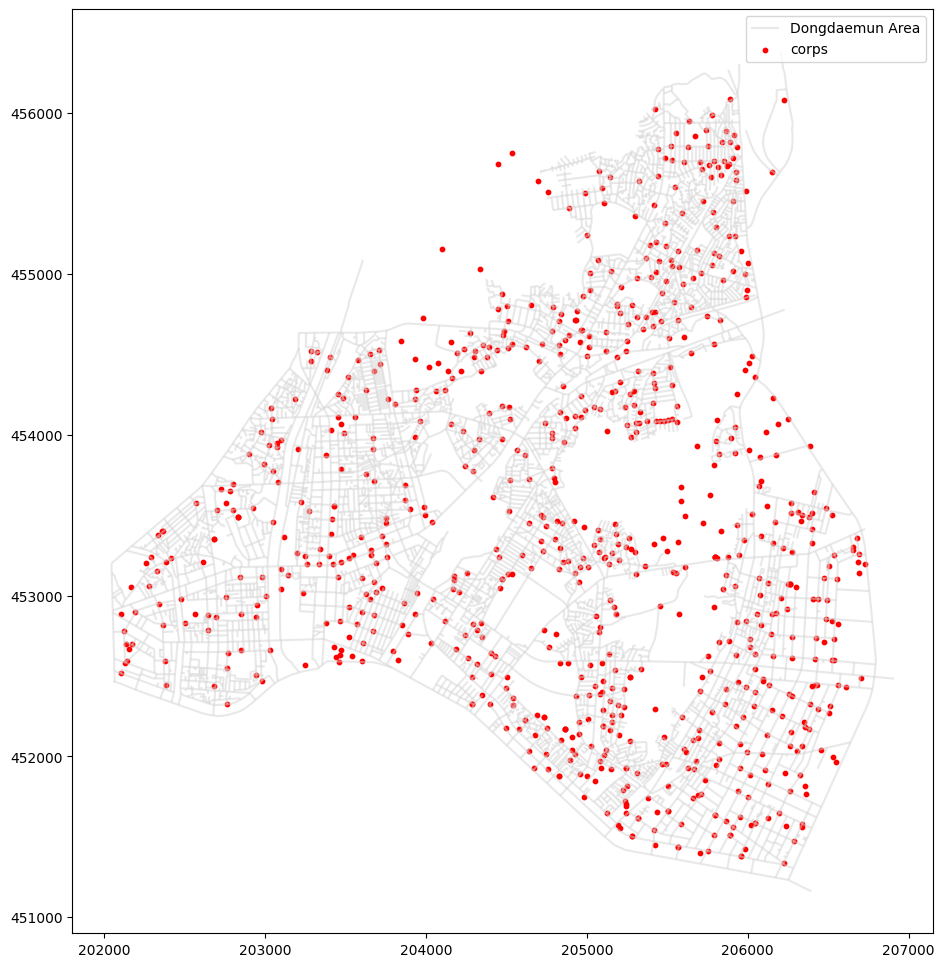

In [ ]:
# 보안등 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(cctv['x'], cctv['y'])]
cctv_geo = gpd.GeoDataFrame(cctv, geometry=geometry, crs="EPSG:4326")

# 보안등 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
cctv_geo = cctv_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 법인 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
cctv_geo.plot(ax=ax, color='red', markersize=10, label='corps')
plt.legend()
plt.show()

In [ ]:
# 소재지도로명주소가 null인 데이터 제거
cctv = cctv.dropna(subset=['소재지도로명주소'])

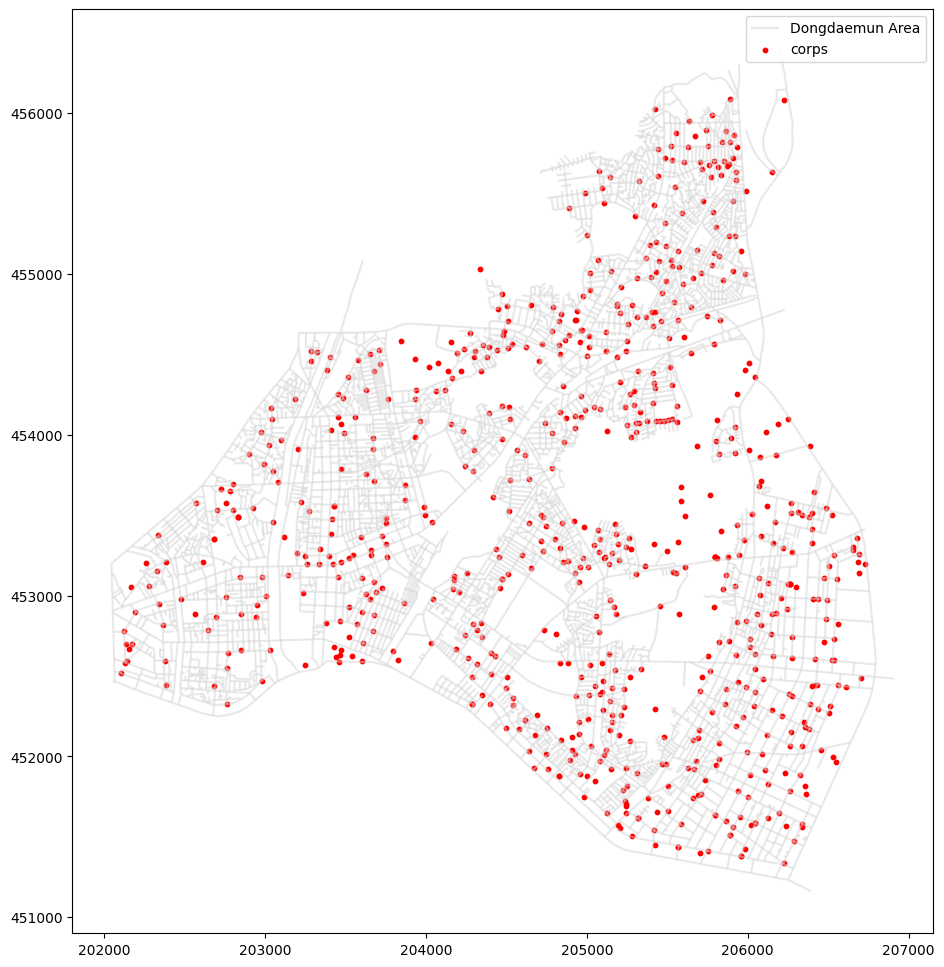

In [ ]:
# 보안등 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(cctv['x'], cctv['y'])]
cctv_geo = gpd.GeoDataFrame(cctv, geometry=geometry, crs="EPSG:4326")

# 보안등 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
cctv_geo = cctv_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 법인 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
cctv_geo.plot(ax=ax, color='red', markersize=10, label='corps')
plt.legend()
plt.show()

In [ ]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/cctv 데이터.csv"
cctv.to_csv(output_path, index=False, encoding='utf-8-sig')